# Wielowymiarowy rozkład normalny

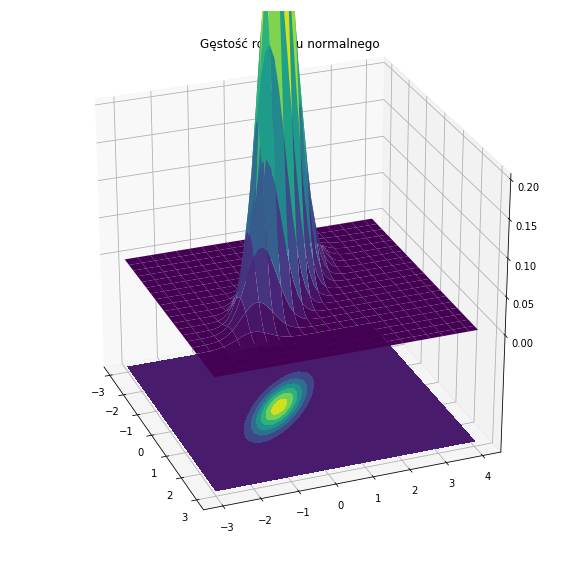

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# Poniższy kod jest wzięty z [https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/]
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y) #siatka punktów

# średnia i macierz kowariancji
mu = np.array([0, 0])
Sigma = np.array([[ 1/2 , -0.4], [-0.4,  1/2]])

# Tworzymy trójwymiarowy wektor
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

Z = multivariate_gaussian(pos, mu, Sigma)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)
plt.title('Gęstość rozkładu normalnego')
plt.show()

# GDA - na przykładzie irysów

W zbiorze tym mamy do czynienia z:
- 3 klasami: Setosa (y=0), Versicolor (y=1), Virginica (y=2),
- 4 cechy (n=4)


Importujemy dane i przygotowujemy je pod analizę działania GDA (LDA)

In [14]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
df = pd.read_csv(url, names=names)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [338]:
df.shape

(150, 5)

In [339]:
df.isnull().values.any()

False

Dzielimy dane na zbiór z cechami oraz klasami

In [16]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

Dzielimy dane na zbiór uczący i testowy

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Skalujemy dane (zalecane) i sprawdzamy wydajność

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

lda = LDA()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

print('Dokładność prognoz: ' + str(accuracy_score(y_test, y_pred)))

Dokładność prognoz: 0.9777777777777777


# Naive Bayes - Iris dataset

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_Bayes = gnb.fit(X_train, y_train).predict(X_test)
print('Dokładność prognoz: ' + str(accuracy_score(y_test, y_pred_Bayes)))

Dokładność prognoz: 1.0


# Naive Bayes - dane syntetyczne

In [20]:
import numpy as np
import random
from sklearn.naive_bayes import MultinomialNB

rng = np.random.RandomState(42)
X_Bayes = rng.randint(6, size=(3, 100))
Klasa_1 = ['Klasa 1' for i in range(20)]
Klasa_2 = ['Klasa 2' for i in range(50)]
Klasa_3 = ['Klasa 3' for i in range(30)]
klasy = Klasa_1+Klasa_2+Klasa_3
y_Bayes = random.sample(klasy, 100)
y_Bayes = np.array(y_Bayes)

data_Bayes = {'X1': X_Bayes[0][:], 'X2': X_Bayes[1][:], 'X3': X_Bayes[2][:], 'Klasa': y_Bayes}



data_Bayes = pd.DataFrame(data_Bayes, columns = ['X1','X2','X3', 'Klasa'])

In [22]:
X_Bayes_1 = df.iloc[:, 0:3].values
y_Bayes_1 = df.iloc[:, 4].values
data_Bayes.head()

,X1,X2,X3,Klasa
0,3,4,0,Klasa 2
1,4,0,3,Klasa 2
2,2,0,0,Klasa 2
3,4,0,5,Klasa 1
4,4,0,0,Klasa 2


In [23]:
X_train_Bayes, X_test_Bayes, y_train_Bayes, y_test_Bayes = train_test_split(X_Bayes_1, y_Bayes_1, test_size=0.3, random_state=42)

In [24]:
clf = MultinomialNB()
clf.fit(X_train_Bayes, y_train_Bayes)
y_pred_Bayes = clf.predict(X_test_Bayes)
print('Dokładność prognoz: ' + str(accuracy_score(y_test_Bayes, y_pred_Bayes)))

Dokładność prognoz: 0.9333333333333333
